# Business Understanding

Analyzing the mental health in tech Survey from 2014
Questions to be answered:
- Does the family history of mental health affect the decision of seeking treatment?
- Is there any relation between the ability of the people to seek help for mental health problems and their ages?
- What is the proportion of people that feel that mental health problems interfere with work?

In [4]:
#import important libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# read the data from the csv file and save it in a dataframe
df = pd.read_csv('./survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN



# Data Understanding

In [5]:
#Find the number of rows and columns in the dataset.
print('The data frame has {} rows'.format(df.shape[0]))
print('The data frame has {} columns'.format(df.shape[1]))

The data frame has 1259 rows
The data frame has 27 columns


In [419]:
#Use .info() and .describe() to get some insights:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


# Data Preparation:
This section will be used to prepare and clean the data for further analysis.

In [6]:
#How many missing values in the dataset? 
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
#drop unwanted columns(It will not be used on the analysis):
df=df.drop(['Timestamp','Gender','state','self_employed','comments'],axis=1)
df.head()

,Age,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,United States,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,United States,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Canada,No,No,Rarely,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,United States,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [8]:
#clean the Age column from illogical responces:

#create a copy of Age column
Age_col= df['Age'].copy()
#creae an array for only logical age values:
Age_without_outliers=[]
for i in range(Age_col.shape[0]):
    if Age_col[i]< 90 and Age_col[i]>12:
        Age_without_outliers.append(Age_col[i])
#calculate the mean of the logical age values:
age_mean=np.mean(Age_without_outliers)
print('The mean of the logical ages is {})'.format(age_mean))
# change the value of illogical ages to the mean of logical values:
for i in range(Age_col.shape[0]):
    if Age_col[i]> 90 or Age_col[i]<12:
        Age_col[i]= age_mean
Age_col.describe()
# Add the new (clean) Age_col to the original df  and delete the origional col:
df.pop('Age')
df.insert(0,'Age',Age_col)
df.head()
df.describe()


The mean of the logical ages is 32.07673860911271)


,Age
count,1259.000000
mean,32.076251
std,7.265063
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [9]:
# identifiy the percentage of null values in work_interfere col
df['work_interfere'].isnull().sum()/df.shape[0]

0.2096902303415409

In [10]:
#Since the percentege of the null values less than 50% it should not be removed
# create a function to encode the categorical variables with NaN:

def encode_cat(dataFrame,col_to_encode,dummy_na=True):
    '''
    INPUT:
    dataFrame - The source dataframe that contain the column with categorical variables
    col_to_encode - The column that is wanted to create dummy variables for it
    dummy_na -  A boolean variable that decided whether or not a dummy variable is wanted for NaN
                it is true by default 
    
    OUTPUT:
    df - a new dataframe with the dummy variables columns, after removing the original column 
         that is encoded 
    '''
    for col in  col_to_encode:
        #drop the col
        df1=dataFrame.drop(col, axis=1)
        #create a dummy variable
        df2=pd.get_dummies(dataFrame[col], prefix=col, dummy_na=dummy_na)
        #concatenation of the df1 and df2
        dataFrame = pd.concat([df1,df2], axis=1)

    return dataFrame

In [11]:
# create dummy variables for work_interfere
cols_to_encode=['work_interfere']
df=encode_cat(df,cols_to_encode)



In [12]:
#How many missing values in the dataset? 
df.isnull().sum()

Age                          0
Country                      0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
work_interfere_Never         0
work_interfere_Often         0
work_interfere_Rarely        0
work_interfere_Sometimes     0
work_interfere_nan           0
dtype: int64

In [13]:
#identify whether or not there are duplicated rows
df.duplicated().sum()

4

In [14]:
#drop diplicated rows
df.drop_duplicates(keep=False, inplace=True)


In [15]:
#identify whether or not there are duplicated rows
df.duplicated().sum()

0




### Aftear cleaning the  data, the dataframe is  ready to be used  to compute statistics and create visualizations with the goal of addressing the research questions.


## Question 1:  Does the family history of mental health affect the decision of seeking treatment?

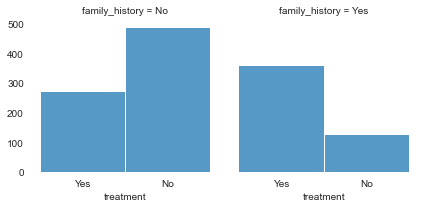

In [16]:
# create a multi plot grid using FacetGrid() to plot condtional relation with family history column
#styling the plot
sns.set_style("whitegrid", {'axes.grid' : False,'axes.edgecolor':'none'})
g = sns.FacetGrid(df, col="family_history")
# map the FacetGrid with histplot of treatment
g.map(sns.histplot, "treatment")



Finding: The histogram plot shows that more than two-thirds of the people that had a family history of mental health problems tend to seek treatment for mental health problems. In contrast, almost a third of the people did not have a family history of mental health problems. This emphasizes that people who had a family history are more likely to seek mental health treatment. 

## Question2: Is there any relation between the ability of the people to seek help for mental health problems and their ages?

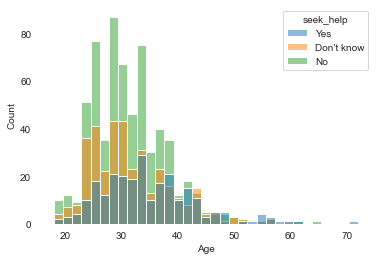

In [17]:
# Create a histogram of the Age column with seek_help column mapping
a= sns.histplot(df,x='Age',hue='seek_help')

Finding: The histogram shows that the number of people who don't tend to seek help is the highest for almost all columns in the ages in the histogram, which can show that most people don't tend to seek help regardless of their age.

## Question3: What is the proportion of people that feel that mental health problems interfere with work?

Text(0.5, 1.0, 'Mental Health Problems and work ')

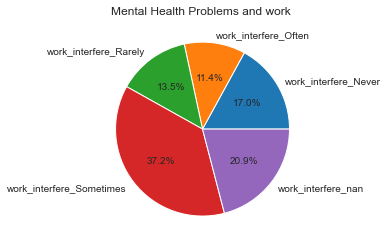

In [18]:
# calculate the percentege of each response in work_interfer from the dummy variables
work_interfere_Never =df['work_interfere_Never'].value_counts(normalize=True)[1]
work_interfere_often =df['work_interfere_Often'].value_counts(normalize=True)[1]
work_interfere_Rarely=df['work_interfere_Rarely'].value_counts(normalize=True)[1]
work_interfere_Sometimes=df['work_interfere_Sometimes'].value_counts(normalize=True)[1]
work_interfere_nan=df['work_interfere_nan'].value_counts(normalize=True)[1]
# identify work interfer data and label:
labels= 'work_interfere_Never','work_interfere_Often','work_interfere_Rarely','work_interfere_Sometimes','work_interfere_nan'
work_interfere=[work_interfere_Never,work_interfere_often,work_interfere_Rarely,work_interfere_Sometimes,work_interfere_nan]
# create a pie chart:
plt.pie(work_interfere,labels=labels,autopct='%1.1f%%')
plt.title('Mental Health Problems and work ')



Finding: From the pie chart, the highest proportion (37.2%) of people feels that mental problems sometimes interfere with work, besides 11.4% of people who feel that mental health problems often interfere with work, which is 48.6% in total.

On the other side, 13.5% of people feel that mental problems rarely interfere with work, along with 17% who think it never interferes with work, which is 30% in total.

About 21% didn't respond to that question, either because they don't know the effect of mental health problems, or they don't like to share their opinion in that regard.

# Conclusion:

- That people who had a family history are more likely to seek mental health treatment.
- Most people don't tend to seek help for mental health proplems regardless of their age.
- The people who feels that mental problems interfere with work is more than those who did not think that its interfere with the work.


In [19]:
#export the dataframe to csv file:
df.to_csv("clean_df_survey.csv")